<a href="https://colab.research.google.com/github/AndyGoncalves/Recommendation_system/blob/main/americanas_candies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistema de Recomendação - Americanas**

**Importar bibliotecas**

In [ ]:
!pip install implicit tabulate
!pip install implicit
#implicit faz a filtragem colaborstiva

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.6 MB 266 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
import implicit
import tabulate

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",


**Exemplo**

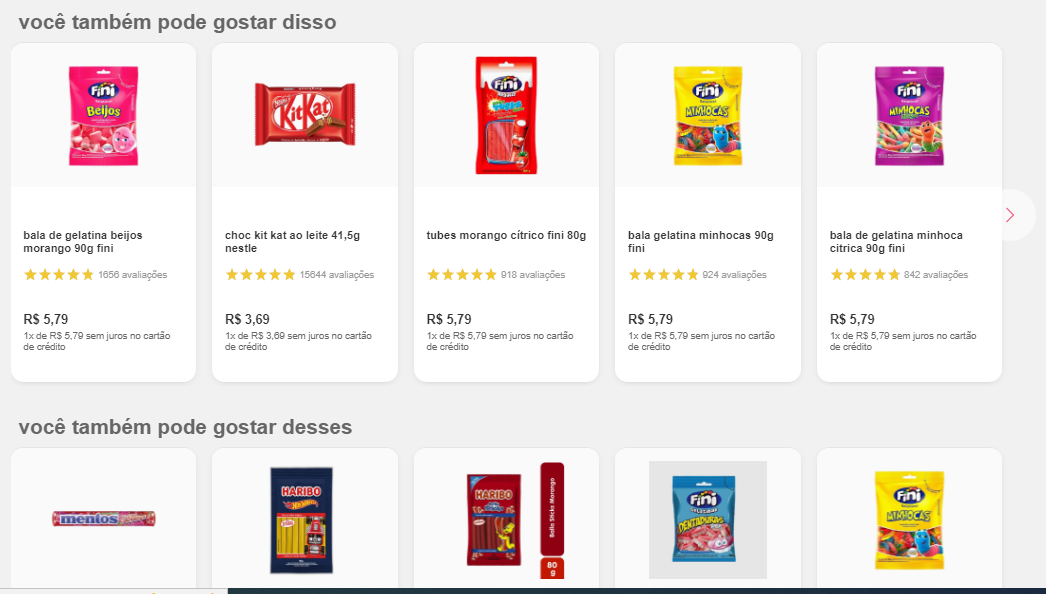

## **Recomendação baseada em conteúdo**

In [ ]:
#criando a matriz para exemplificar

itens = {
    "bala beijos": [1,0,0,1,0],
    "kit kat": [0,1,0,0,1],
    "Tubos": [1,0,0,1,0],
    "bala minhoca citrica": [1,0,1,1,0],
    "bala mentos":[0,0,1,0,0],
    "dentadura":[1,0,0,1,0]
    }

cols_name = ["Gelatina", "Chocolate", "Citrico", "Fini", "Nestle"]

In [ ]:
#formando o dataset 

item_df = pd.DataFrame(data = itens, index = cols_name).T
item_df

,Gelatina,Chocolate,Citrico,Fini,Nestle
bala beijos,1,0,0,1,0
kit kat,0,1,0,0,1
Tubos,1,0,0,1,0
bala minhoca citrica,1,0,1,1,0
bala mentos,0,0,1,0,0
dentadura,1,0,0,1,0


In [ ]:
user_preference = {
    "bala beijos": 1,
    "kit kat": -1,
    "Tubos": 1,
    "bala minhoca citrica": -1,
    "bala mentos":np.NaN,
    "dentadura":np.NaN,
    }

user_df = pd.DataFrame(data = user_preference, index = ["pessoa_usuaria"]).T
user_df

,pessoa_usuaria
bala beijos,1.0
kit kat,-1.0
Tubos,1.0
bala minhoca citrica,-1.0
bala mentos,NaN
dentadura,NaN


In [ ]:
#multiplicar cada linha pela respectiva avaliacao

df_score_doce = item_df.multiply(user_df["pessoa_usuaria"], axis = 0) #axis serve para multiplicar a linha
df_score_doce

,Gelatina,Chocolate,Citrico,Fini,Nestle
bala beijos,1.0,0.0,0.0,1.0,0.0
kit kat,-0.0,-1.0,-0.0,-0.0,-1.0
Tubos,1.0,0.0,0.0,1.0,0.0
bala minhoca citrica,-1.0,-0.0,-1.0,-1.0,-0.0
bala mentos,NaN,NaN,NaN,NaN,NaN
dentadura,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_profile = df_score_doce.sum()
user_profile

Gelatina     2.0
Chocolate   -1.0
Citrico     -1.0
Fini         2.0
Nestle      -1.0
dtype: float64

Recomendação

In [ ]:
#agora vamos multiplicar as caracteristicas de cada doce com as características da pessoa
item_df.multiply(user_profile).sum(axis = 1) #axis = 1 para somar por linha

bala beijos             4.0
kit kat                -2.0
Tubos                   4.0
bala minhoca            4.0
bala minhoca citrica    3.0
bala mentos            -1.0
dentadura               4.0
dtype: float64

Entre "bala mentos"(-1.0) e "bala dentadura" (4.0), pelo o sistema simples apresentado aqui, é melhor recomendar "bala dentadura".

## Filtragem colaborativa

In [ ]:
# gerando os dados

def generate_data(n_users=10_000):
  n_users = int(n_users/2)
  feedback = {
      "bala beijos": [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)], 
      "kit kat": [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)],
      "Tubos": [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)],
      "bala minhoca citrica": [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)],
      "bala mentos": [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)],
      "dentadura": [np.random.choice([-1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)] + [np.random.choice([1, np.nan])*np.random.randint(1, 6) for _ in range(n_users)]
  }
  users = [f"Pessoa {i}" for i in range(1, 2*n_users+1)]
  R = pd.DataFrame(data=feedback, index=users)
  return R

In [ ]:
R = generate_data()
R

,bala beijos,kit kat,Tubos,bala minhoca citrica,bala mentos,dentadura
Pessoa 1,2.0,-2.0,NaN,5.0,NaN,-5.0
Pessoa 2,NaN,-3.0,NaN,3.0,NaN,NaN
Pessoa 3,4.0,-5.0,-3.0,3.0,NaN,NaN
Pessoa 4,4.0,NaN,-4.0,NaN,3.0,-1.0
Pessoa 5,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...
Pessoa 9996,-3.0,2.0,3.0,-5.0,-3.0,1.0
Pessoa 9997,NaN,2.0,NaN,NaN,NaN,NaN
Pessoa 9998,NaN,NaN,2.0,NaN,NaN,NaN
Pessoa 9999,NaN,NaN,2.0,-2.0,-2.0,NaN


In [ ]:
R.isnull().sum()

bala beijos             4912
kit kat                 4953
Tubos                   4974
bala minhoca citrica    5014
bala mentos             5005
dentadura               4934
dtype: int64

In [ ]:
R_sparse = R.reset_index() #criando uma coluna de index para que "pessoa 1, pessoa 2...." não seja mais o índice 
R_sparse

,index,bala beijos,kit kat,Tubos,bala minhoca citrica,bala mentos,dentadura
0,Pessoa 1,2.0,-2.0,NaN,5.0,NaN,-5.0
1,Pessoa 2,NaN,-3.0,NaN,3.0,NaN,NaN
2,Pessoa 3,4.0,-5.0,-3.0,3.0,NaN,NaN
3,Pessoa 4,4.0,NaN,-4.0,NaN,3.0,-1.0
4,Pessoa 5,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...
9995,Pessoa 9996,-3.0,2.0,3.0,-5.0,-3.0,1.0
9996,Pessoa 9997,NaN,2.0,NaN,NaN,NaN,NaN
9997,Pessoa 9998,NaN,NaN,2.0,NaN,NaN,NaN
9998,Pessoa 9999,NaN,NaN,2.0,-2.0,-2.0,NaN


In [ ]:
R_sparse = R_sparse.melt(id_vars=["index"])  #transformando colunas em linhas
R_sparse

,index,variable,value
0,Pessoa 1,bala beijos,2.0
1,Pessoa 2,bala beijos,NaN
2,Pessoa 3,bala beijos,4.0
3,Pessoa 4,bala beijos,4.0
4,Pessoa 5,bala beijos,NaN
...,...,...,...
59995,Pessoa 9996,dentadura,1.0
59996,Pessoa 9997,dentadura,NaN
59997,Pessoa 9998,dentadura,NaN
59998,Pessoa 9999,dentadura,NaN


In [ ]:
 R_sparse = R_sparse.rename(
        {
            "index": "user",
            "variable": "candy",
            "value": "feedback"
        },
        axis=1
    ) #renomeando colunas
R_sparse

,user,candy,feedback
0,Pessoa 1,bala beijos,2.0
1,Pessoa 2,bala beijos,NaN
2,Pessoa 3,bala beijos,4.0
3,Pessoa 4,bala beijos,4.0
4,Pessoa 5,bala beijos,NaN
...,...,...,...
59995,Pessoa 9996,dentadura,1.0
59996,Pessoa 9997,dentadura,NaN
59997,Pessoa 9998,dentadura,NaN
59998,Pessoa 9999,dentadura,NaN


In [ ]:
# Transformando os tipos user e movie em categorias
R_sparse["user"] = R_sparse["user"].astype("category")
R_sparse["candy"] = R_sparse["candy"].astype("category")
R_sparse

# transformando categorias em numericos
R_sparse["userid"] = R_sparse["user"].cat.codes
R_sparse["candyid"] = R_sparse["candy"].cat.codes


# Drop nan - criando tabela so com valores, sem nulos - essa vai ser nossa tabela para treino
R_sparse.dropna(inplace=True)
R_sparse

,user,candy,feedback,userid,candyid
0,Pessoa 1,bala beijos,2.0,0,1
2,Pessoa 3,bala beijos,4.0,2223,1
3,Pessoa 4,bala beijos,4.0,3334,1
8,Pessoa 9,bala beijos,2.0,8889,1
10,Pessoa 11,bala beijos,4.0,113,1
...,...,...,...,...,...
59988,Pessoa 9989,dentadura,1.0,9988,4
59989,Pessoa 9990,dentadura,2.0,9990,4
59991,Pessoa 9992,dentadura,3.0,9992,4
59995,Pessoa 9996,dentadura,1.0,9996,4


In [ ]:
#salvamos R_sparse em formato de matriz
R_csr = sparse.csr.csr_matrix((R_sparse["feedback"].astype(float), (R_sparse["userid"], R_sparse["candyid"])))
R_csr

<10000x6 sparse matrix of type '<class 'numpy.float64'>'
	with 30208 stored elements in Compressed Sparse Row format>

In [ ]:
# chama o modelo
import implicit 

als = implicit.als.AlternatingLeastSquares(
    regularization=0.01, # como é um modelo de regressão linear, podemos usar regularização
    iterations=100
)

/usr/local/lib/python3.7/dist-packages/implicit/utils.py:29: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "


In [ ]:
#treina o modelo
als.fit(R_csr)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#lembrando o id de cada filme
R_sparse.drop_duplicates(subset=["candy", "candyid"])[["candy", "candyid"]]

,candy,candyid
0,bala beijos,1
10000,kit kat,5
20002,Tubos,0
30000,bala minhoca citrica,3
40003,bala mentos,2
50000,dentadura,4


In [ ]:
#vamos ver a recomendacao 
#biblioteca implicit já da as recomendacoes para todos os usuarios

array = als.recommend_all(user_items=R_csr, N=3) 
#passa matriz e o número de recomendacoes que voce quer (numero de itens, se colocar menos ele vai dar só as primeiras recomendacoes para aquele usuari)


In [ ]:
als.similar_items(5, N=6)

(array([5, 0, 4, 3, 2, 1], dtype=int32),
 array([ 9.9999994e-01,  3.8615777e-03,  2.6362105e-03,  3.9363472e-04,
         2.8547618e-04, -3.3991138e-04], dtype=float32))

In [ ]:
df = pd.DataFrame(array, columns = ['1a','2a','3a'])
df

,1a,2a,3a
0,2,0,1
1,3,0,1
2,2,5,4
3,2,1,0
4,5,1,2
...,...,...,...
9995,5,4,2
9996,2,1,0
9997,0,4,3
9998,5,3,4


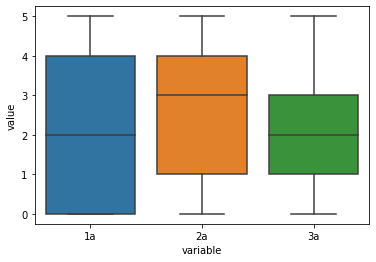

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()